# Project : Case Study (Part - II)
Problem 1 :

Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


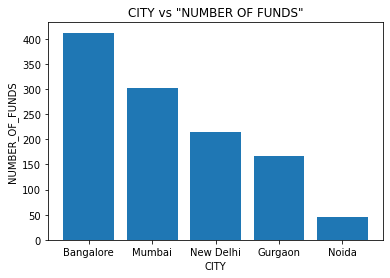

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["CityLocation"],inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('CityLocation')['AmountInUSD'].count()
df = df.sort_values(ascending = False)
df=df[(df.index=='Bangalore') | (df.index=='Mumbai') | (df.index=='New Delhi') | (df.index=='Gurgaon') | (df.index=='Noida')]
city = df.index
totalfunds = df.values

for i in range(len(city)):
    print(city[i],totalfunds[i])

plt.bar(city ,totalfunds)
plt.ylabel('NUMBER_OF_FUNDS')
plt.xlabel('CITY')
plt.title('CITY vs "NUMBER OF FUNDS"')
plt.show()

## Problem 2

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


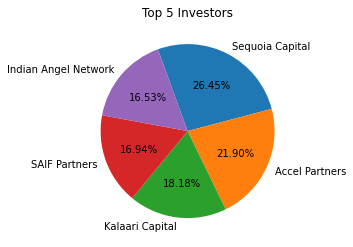

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName'])
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

investors = df.InvestorsName
investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
            
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1

dct_keys = sorted(dct,key=dct.get,reverse=True)
c=0
Inv_name=[]
count=[]
for i in range(len(dct_keys)):
    print(dct_keys[i],dct[dct_keys[i]])
    Inv_name.append(dct_keys[i])
    count.append(dct[dct_keys[i]])
    c+=1
    if c==5:
        break

plt.pie(count,labels=Inv_name,autopct='%0.2f%%',counterclock=False,startangle=110)
plt.title('Top 5 Investors')
plt.show()

## Problem 3

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


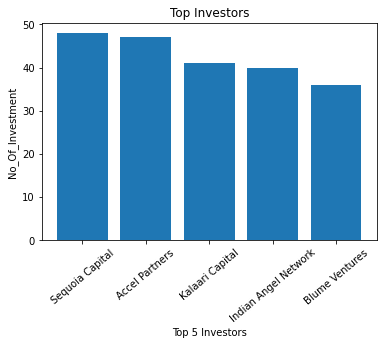

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']


investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)
            
df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count)
plt.xticks(rotation=40)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()

## Problem 4

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


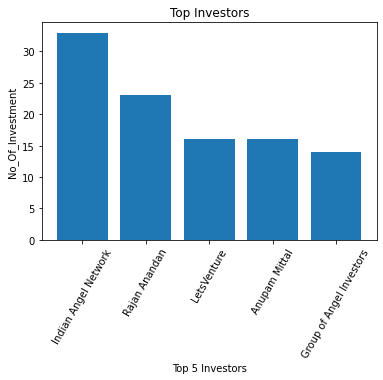

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[(df.InvestmentType == 'Crowd Funding') | (df.InvestmentType == 'Seed Funding')]

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count)
plt.xticks(rotation=60)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()


## Problem 5

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


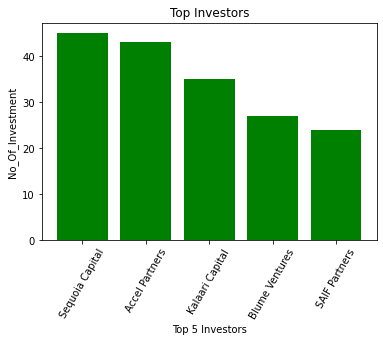

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)
df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[df.InvestmentType == 'Private Equity']

investor_name = []
startup_name = []
for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count,color='green')
plt.xticks(rotation=60)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()

#The END